<a href="https://colab.research.google.com/github/Anissa7/PCA_Formative_/blob/master/Formative_Assignment_PCA_Anissa_Tegawende_OUEDRAOGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with the `fuel_econ.csv` dataset.

Make sure to display outputs for each code cell when submitting.

In [18]:
# Import necessary packages
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
data = np.array([
    [   1,   2,  -1,   4,  10],
    [   3,  -3,  -3,  12, -15],
    [   2,   1,  -2,   4,   5],
    [   5,   1,  -5,  10,   5],
    [   2,   3,  -3,   5,  12],
    [   4,   0,  -3,  16,   2],
])

In [20]:
fuel_econ = pd.read_csv('fuel_econ.csv')

# Handle non-numeric columns in fuel_econ dataset
non_numeric_cols = fuel_econ.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns in fuel_econ:", non_numeric_cols)

# Option 1: Exclude non-numeric columns
fuel_econ_numeric = fuel_econ.select_dtypes(include=[np.number])

Non-numeric columns in fuel_econ: Index(['make', 'model', 'VClass', 'drive', 'trans', 'fuelType'], dtype='object')


In [21]:
# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)


### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

In [22]:
# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [23]:
# Calculate covariance matrix
cov_matrix = np.cov(standardized_data.T)

print() # Change 'Print()' to 'print()' to call the built-in print function

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [24]:
# Step 4: Perform Eigendecomposition
import numpy as np # Make sure numpy is imported

# Calculate covariance matrix first if not already done
cov_matrix = np.cov(standardized_data, rowvar=False)
# rowvar=False to treat observations as rows

# Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Print the results
eigenvalues, eigenvectors

(array([3.80985761e+00, 1.73655615e+00, 4.94531029e-02, 4.74189469e-05,
        4.04085720e-01]),
 array([[-0.4640131 ,  0.45182808, -0.70733581,  0.28128049, -0.03317471],
        [ 0.45019005,  0.48800851,  0.29051532,  0.6706731 , -0.15803498],
        [ 0.37929082, -0.55665017, -0.48462321,  0.24186072, -0.5029143 ],
        [-0.4976889 ,  0.03162214,  0.36999674, -0.03373724, -0.78311558],
        [ 0.43642295,  0.49682965, -0.20861365, -0.64143906, -0.32822489]]))

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

In [25]:
# Step 5: Sort Principal Components
sorted_indices = None  # Sort eigenvalues in descending order
sorted_eigenvectors = None  # Sort eigenvectors accordingly
sorted_eigenvectors

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [26]:
# np.argsort can only provide lowest to highest; use [::-1] to reverse the list

order_of_importance = np.argsort(eigenvalues)[::-1]
print ( 'the order of importance is :\n {}'.format(order_of_importance))

# utilize the sort order to sort eigenvalues and eigenvectors
# Use order_of_importance instead of sorted_indices
sorted_eigenvalues = eigenvalues[order_of_importance]

print('\n\n sorted eigen values:\n{}'.format(sorted_eigenvalues))
# Use order_of_importance instead of sorted_indices
sorted_eigenvectors = eigenvectors[:, order_of_importance]
print('\n\n The sorted eigen vector matrix is: \n {}'.format(sorted_eigenvectors))

the order of importance is :
 [0 1 4 2 3]


 sorted eigen values:
[3.80985761e+00 1.73655615e+00 4.04085720e-01 4.94531029e-02
 4.74189469e-05]


 The sorted eigen vector matrix is: 
 [[-0.4640131   0.45182808 -0.03317471 -0.70733581  0.28128049]
 [ 0.45019005  0.48800851 -0.15803498  0.29051532  0.6706731 ]
 [ 0.37929082 -0.55665017 -0.5029143  -0.48462321  0.24186072]
 [-0.4976889   0.03162214 -0.78311558  0.36999674 -0.03373724]
 [ 0.43642295  0.49682965 -0.32822489 -0.20861365 -0.64143906]]


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [27]:
# Step 6: Project Data onto Principal Components
# Assuming you want to keep the first 2 principal components
num_components = 2
reduced_data = standardized_data.dot(sorted_eigenvectors[:, :num_components])

# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (6, 2)


array([[ 2.3577116 , -0.75728867],
       [-2.27171739, -1.81970663],
       [ 1.21259114, -0.50390931],
       [-1.41935914,  1.9229856 ],
       [ 1.61562536,  0.87541857]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

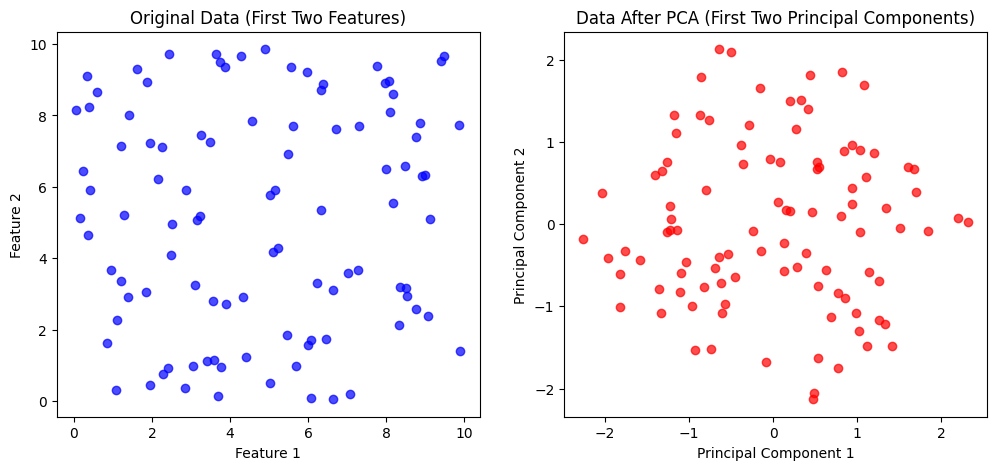

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generate sample data (Replace with your dataset)
np.random.seed(42)
X = np.random.rand(100, 3) * 10  # Simulated 3D dataset

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot original data (first two features)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.7, c='blue')
plt.title("Original Data (First Two Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot reduced data after PCA
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, c='red')
plt.title("Data After PCA (First Two Principal Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()
